In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import warnings 

In [2]:
warnings.filterwarnings("ignore")

##### 1. Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years

In [48]:
Startup = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Multi Linear Regression/50_Startups.csv")

In [49]:
Startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [50]:
Startup = Startup.rename({"R&D Spend":"RDSpend","Marketing Spend":"MarketingSpend"}, axis = 1)

In [51]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [52]:
#check for missing values
Startup.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [53]:
# Correlation matrix
Startup.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


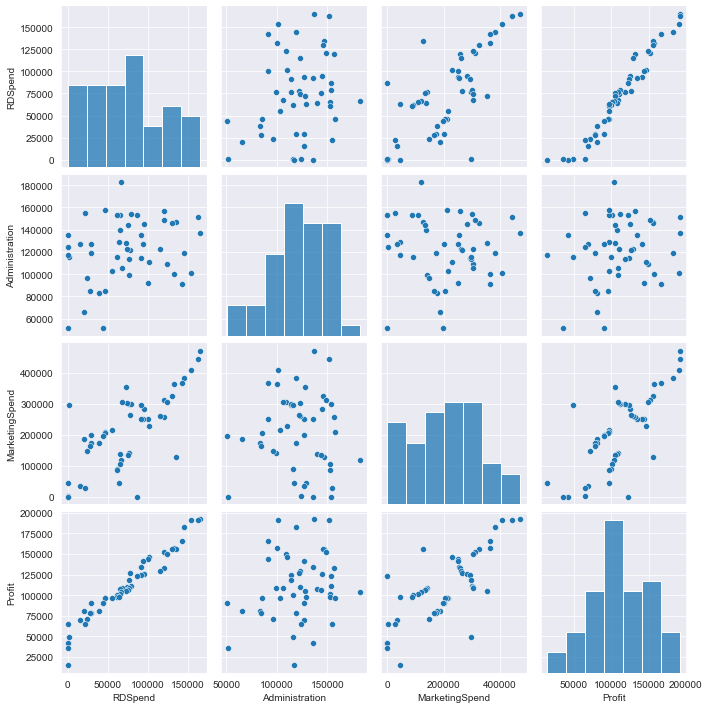

In [54]:
# Scatter plots between varibales along with histograms
sns.set_style(style = "darkgrid")
sns.pairplot(Startup)

In [64]:
# Building model
model = smf.ols("Profit~RDSpend+Administration+MarketingSpend", data = Startup).fit()

In [57]:
# Model parameters
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

##### Regression equation = 50122.192990 + 0.805715 * RDSpend + (-0.026816) * Administration + 0.027228 * MarketingSpend 

In [58]:
# t values and p-values
print(model.tvalues, "\n", model.pvalues)

Intercept          7.626218
RDSpend           17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RDSpend           2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [61]:
# R square value
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [63]:
# Simple linear regression models as the values Adminitration and MarketingSpend are shown as insignificant (p-value > 0.05)
ml_a = smf.ols("Profit ~ Administration", data = Startup).fit()
print(ml_a.tvalues, "\n", ml_a.pvalues)

ml_m = smf.ols("Profit ~ MarketingSpend", data = Startup).fit()
print(ml_m.tvalues, "\n", ml_m.pvalues)

ml_am = smf.ols("Profit ~ Administration + MarketingSpend", data = Startup).fit()
print(ml_am.tvalues, "\n", ml_am.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64
Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64
Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64


In [74]:
# Calculating VIF
rsq_a = smf.ols("Administration~RDSpend+MarketingSpend", data = Startup).fit().rsquared
vif_a = 1 / (1 - rsq_a) # 1.175091

rsq_m = smf.ols("MarketingSpend~RDSpend+Administration", data = Startup).fit().rsquared
vif_m = 1 / (1 - rsq_m) # 2.326773

rsq_rd = smf.ols("RDSpend~MarketingSpend+Administration", data = Startup).fit().rsquared
vif_rd = 1 / (1 - rsq_rd) # 2.468903

data = {"variables": ["Administration", "MarketingSpend", "RDSpend"], "VIF":[vif_a, vif_m, vif_rd]}
Vif_frame = pd.DataFrame(data)
Vif_frame 


,variables,VIF
0,Administration,1.175091
1,MarketingSpend,2.326773
2,RDSpend,2.468903


<function matplotlib.pyplot.show(close=None, block=None)>

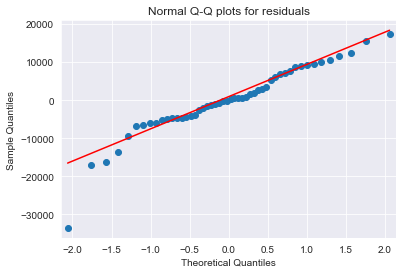

In [82]:
# Residual analysis
qq_plot = sm.qqplot(model.resid, line = "q")
plt.title("Normal Q-Q plots for residuals")
plt.show

In [83]:
list(np.where(model.resid < -20000))

[array([49], dtype=int64)]

In [84]:
# Residual plots for homoscedasticity
def get_standardized_values (vals):
    return(vals - vals.mean() / vals.std())   # z score


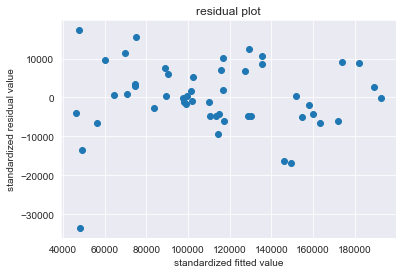

In [85]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted value")
plt.ylabel("standardized residual value")
plt.show()

eval_env: 1


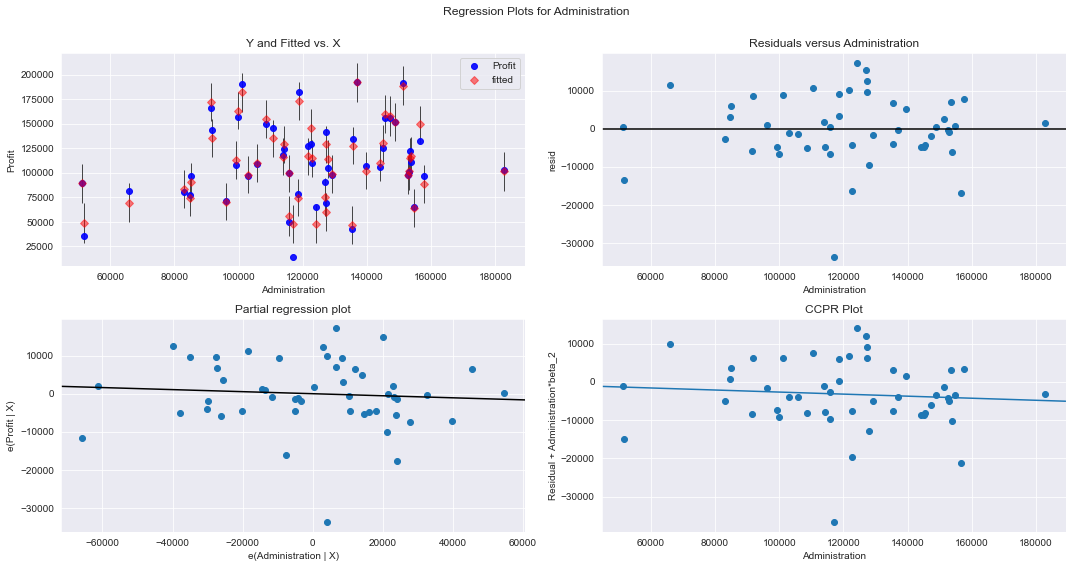

In [89]:
# Residuals with regressors
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig = fig)
plt.show()


eval_env: 1


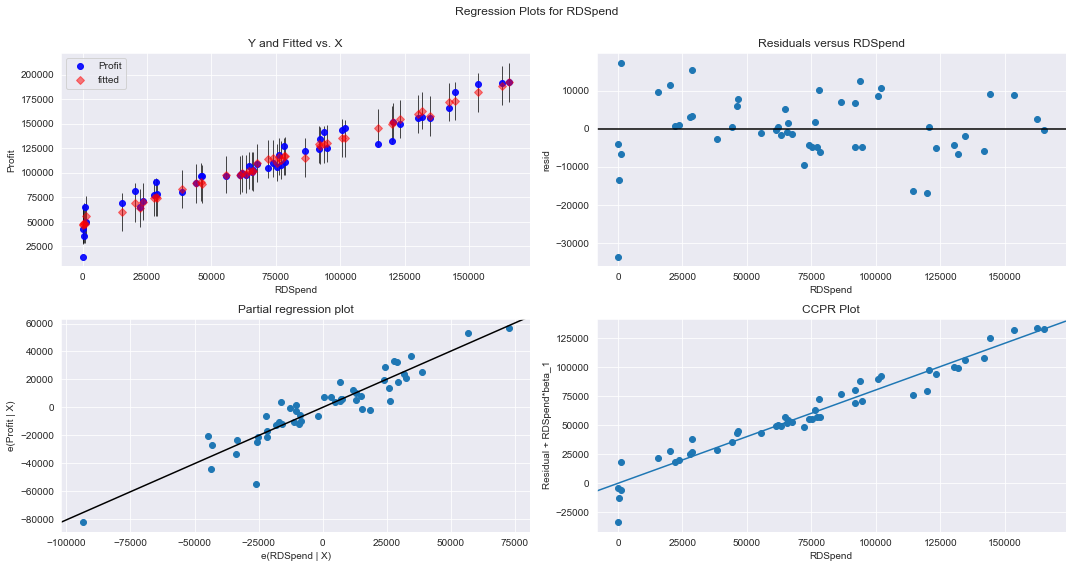

In [90]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig = fig)
plt.show()

eval_env: 1


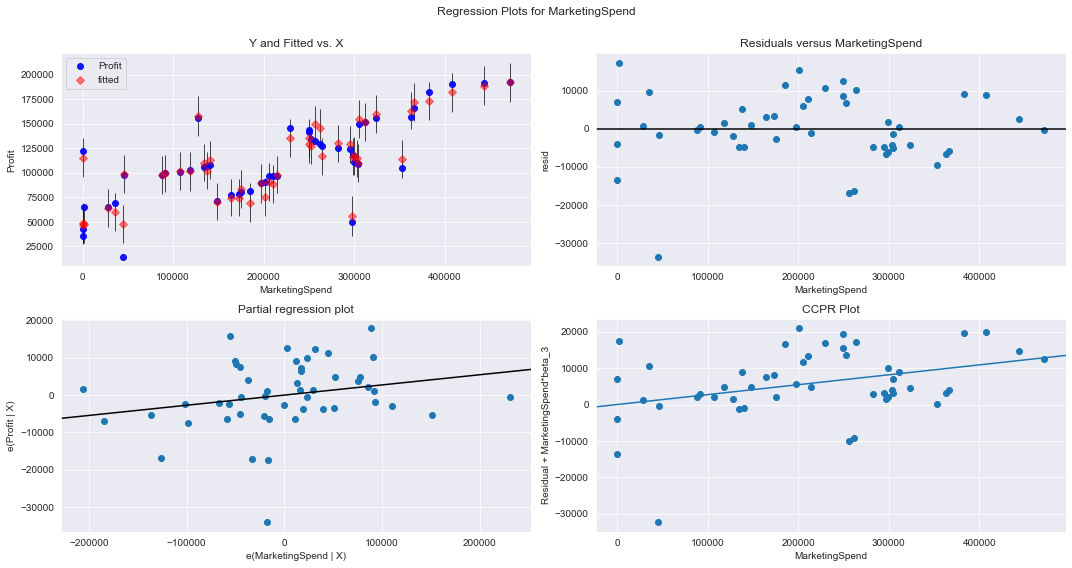

In [91]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig = fig)
plt.show()

In [92]:
# Model Deletion Diagnostic
# Detecting outliers / Influencers

#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


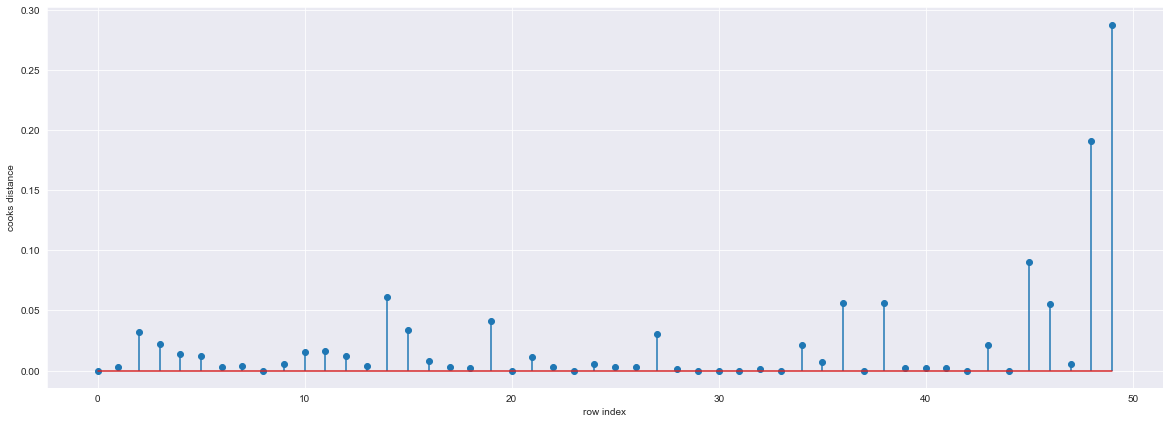

In [93]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Startup)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [95]:
# Index value where cook's distance is greater than 0.2
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

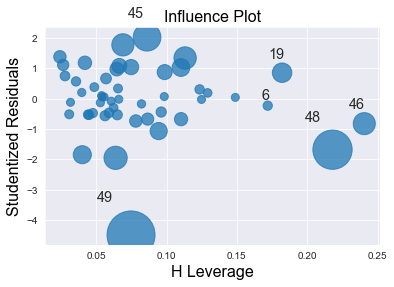

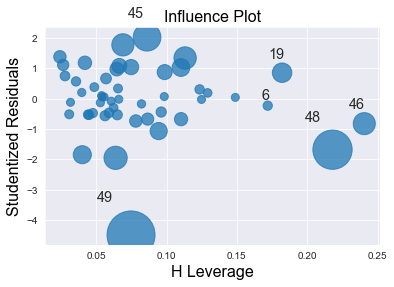

In [96]:
# High Influence points
influence_plot(model)

In [101]:
k = Startup.shape[1]
n = Startup.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff 

0.36

In [102]:
# To pull out the value

Startup[Startup.index.isin([49])]

,RDSpend,Administration,MarketingSpend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [103]:
Startup.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Since the cook's distance for the value in [49] is less than 1 and also under the leverage_cutoff, no need to remove the value
# Hence, the model built is okay to proceed for the predictions.  

##### 2. Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [87]:
Toyota = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Multi Linear Regression/ToyotaCorolla.csv",encoding='unicode_escape')

In [88]:
Toyota.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0


In [89]:
Toyota = Toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]
Toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [90]:
Toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [91]:
#check for missing values
Toyota.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [92]:
# Correlation matrix
Toyota.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [93]:
Toyota[Toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [94]:
Toyota=Toyota.drop_duplicates().reset_index(drop=True)
Toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


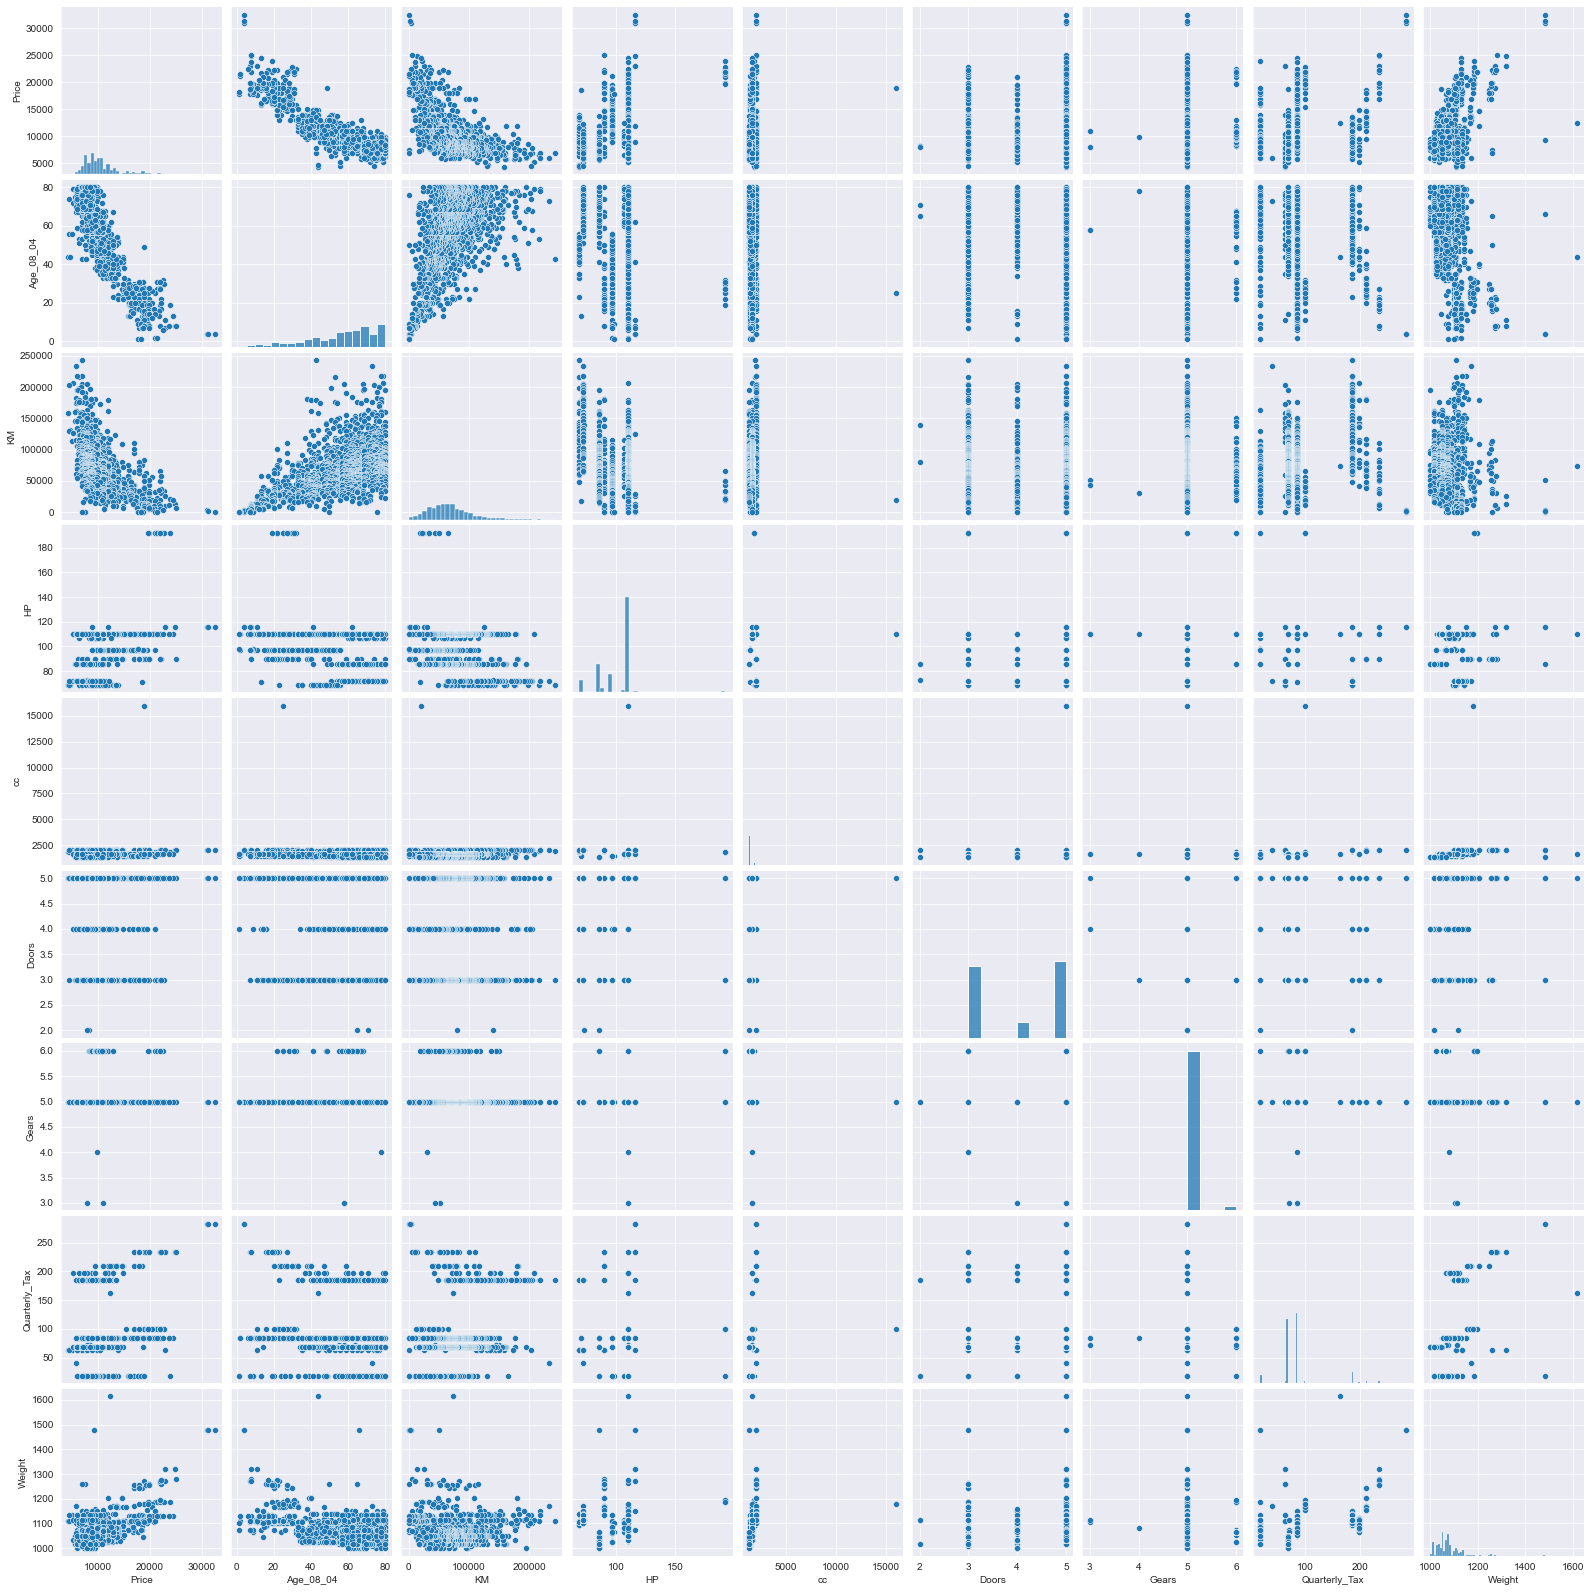

In [95]:
# Scatter plots between varibales along with histograms
sns.set_style(style = "darkgrid")
sns.pairplot(Toyota)

In [96]:
# Building model
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Toyota).fit()

In [97]:
# Model parameters
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [98]:
# t values and p-values
print(model.tvalues, "\n", model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [99]:
# R square value
print(model.rsquared,model.rsquared_adj)

0.8625200256947001 0.8617487495415147


In [100]:
# Simple linear regression models as the values cc and doors are shown as insignificant (p-value > 0.05)
ml_c = smf.ols("Price ~ cc", data = Toyota).fit()
print(ml_c.tvalues, "\n", ml_c.pvalues)

ml_d = smf.ols("Price ~ Doors", data = Toyota).fit()
print(ml_d.tvalues, "\n", ml_d.pvalues)

ml_cd = smf.ols("Price ~ cc + Doors", data = Toyota).fit()
print(ml_cd.tvalues, "\n", ml_cd.pvalues)



Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64
Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64
Intercept    12.786341
cc            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
cc           2.101878e-05
Doors        2.109558e-11
dtype: float64


In [101]:
# Calculating VIF
rsq_c = smf.ols("cc ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight", data = Toyota).fit().rsquared
vif_c = 1 / (1 - rsq_c) # 1.175091

rsq_a = smf.ols("Age_08_04 ~ KM + HP + Doors + Gears + Quarterly_Tax + Weight + cc", data = Toyota).fit().rsquared
vif_a = 1 / (1 - rsq_a) # 2.326773

rsq_km = smf.ols("KM ~ HP + Doors + Gears + Quarterly_Tax + Weight + cc + Age_08_04", data = Toyota).fit().rsquared
vif_km = 1 / (1 - rsq_km) # 2.468903

rsq_hp = smf.ols("HP ~ Doors + Gears + Quarterly_Tax + Weight + cc + Age_08_04 + KM ", data = Toyota).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_d = smf.ols("Doors ~ Gears + Quarterly_Tax + Weight + cc + Age_08_04 + KM + HP", data = Toyota).fit().rsquared
vif_d = 1 / (1 - rsq_d)

rsq_g = smf.ols("Gears ~ Quarterly_Tax + Weight + cc + Age_08_04 + KM + HP + Doors", data = Toyota).fit().rsquared
vif_g = 1 / (1 - rsq_g)

rsq_q = smf.ols("Quarterly_Tax ~ Weight + cc + Age_08_04 + KM + HP + Doors + Gears", data = Toyota).fit().rsquared
vif_q = 1 / (1 - rsq_q)

rsq_w = smf.ols("Weight ~ cc + Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax", data = Toyota).fit().rsquared
vif_w = 1 / (1 - rsq_w)

data = {"variables": ["cc", "Age_08_04", "KM", "HP", "Doors", "Gears", "Quarterly_Tax", "Weight"], "VIF":[vif_c, vif_a, vif_km, vif_hp, vif_d, vif_g, vif_q, vif_w]}
Vif_frame = pd.DataFrame(data)
Vif_frame 


,variables,VIF
0,cc,1.163470
1,Age_08_04,1.876236
2,KM,1.757178
3,HP,1.419180
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


<function matplotlib.pyplot.show(close=None, block=None)>

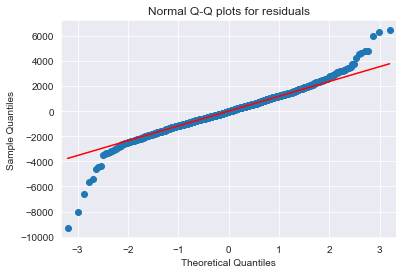

In [102]:
# Residual analysis
qq_plot = sm.qqplot(model.resid, line = "q")
plt.title("Normal Q-Q plots for residuals")
plt.show

In [103]:
list(np.where(model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

In [104]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [105]:
# Residual plots for homoscedasticity
def get_standardized_values (vals):
    return(vals - vals.mean() / vals.std())   # z score

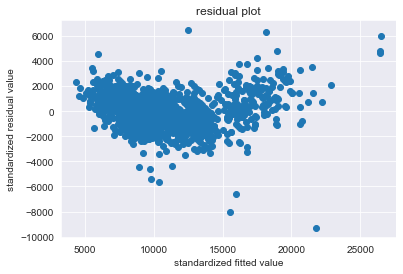

In [106]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted value")
plt.ylabel("standardized residual value")
plt.show()

eval_env: 1


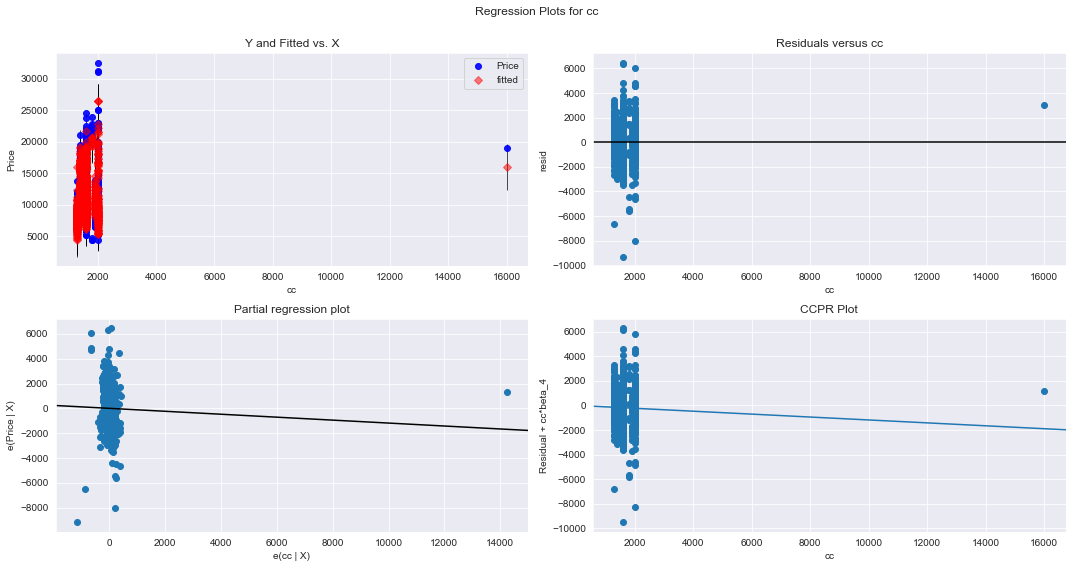

In [107]:
# Residuals with regressors
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig = fig)
plt.show()


eval_env: 1


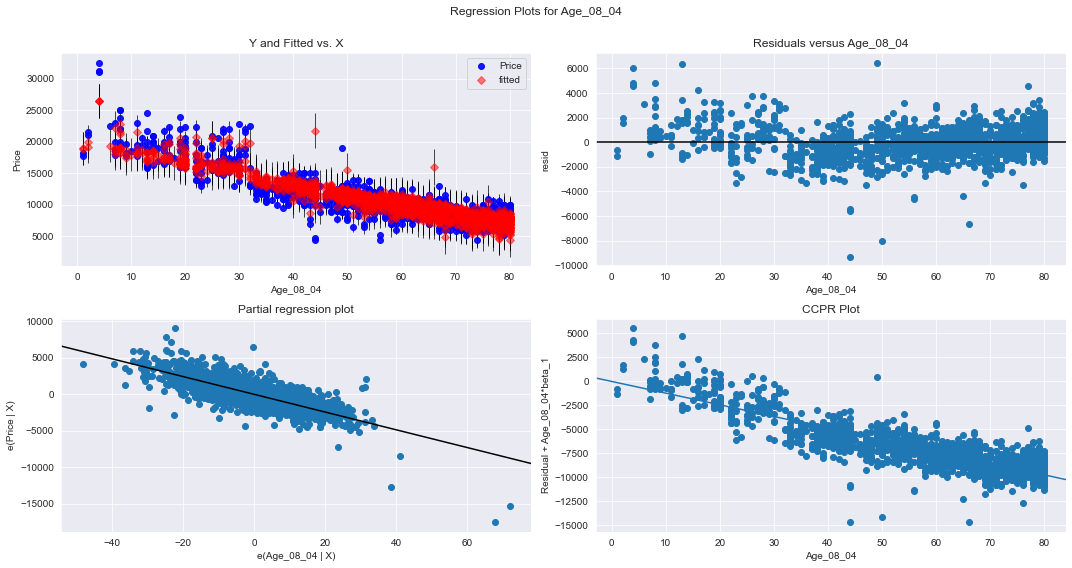

In [108]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig = fig)
plt.show()

eval_env: 1


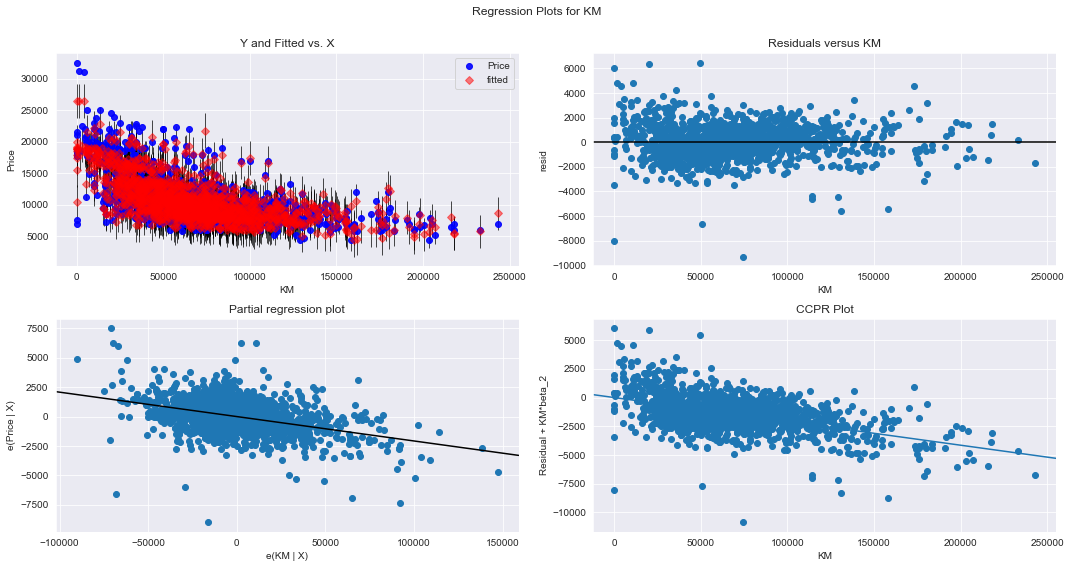

In [109]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig = fig)
plt.show()

eval_env: 1


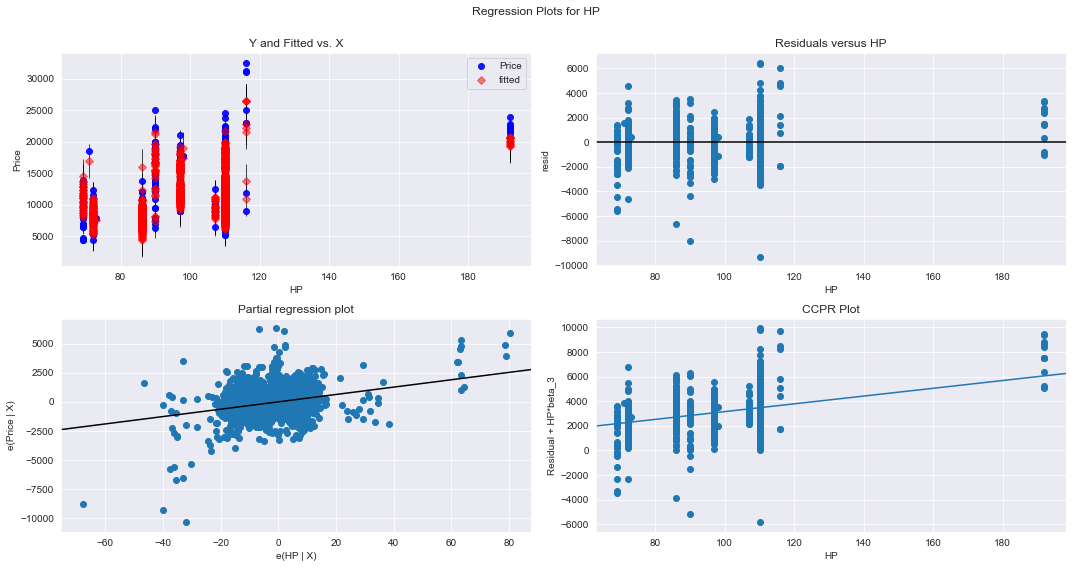

In [110]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig = fig)
plt.show()

eval_env: 1


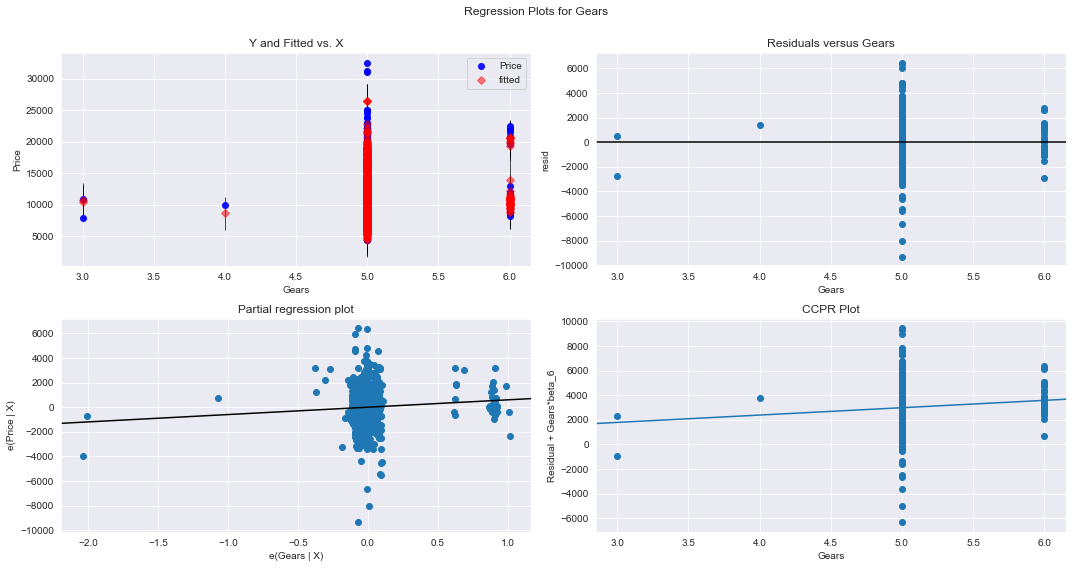

In [111]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig = fig)
plt.show()

eval_env: 1


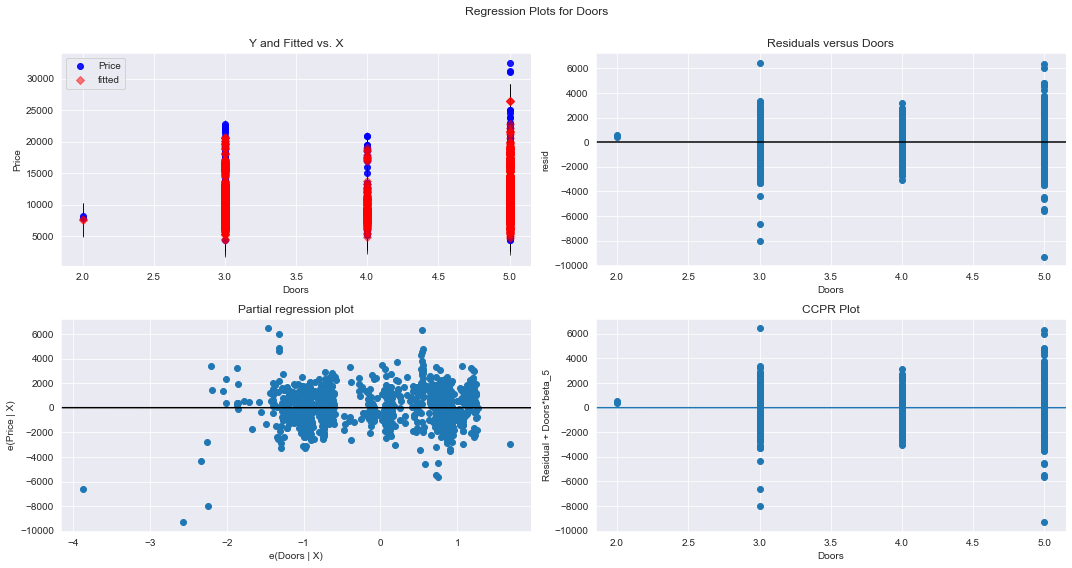

In [112]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig = fig)
plt.show()

eval_env: 1


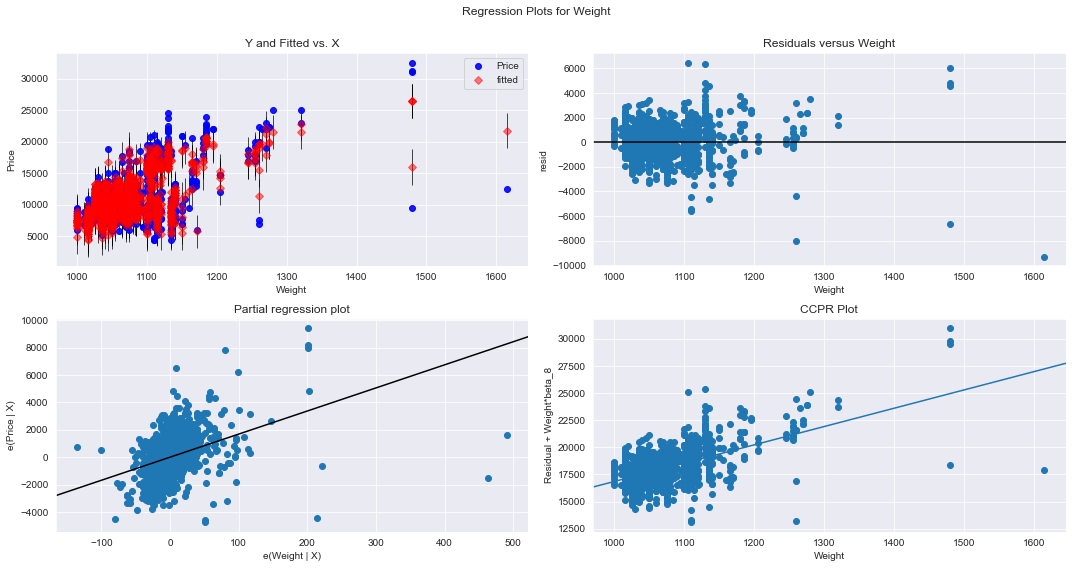

In [113]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig = fig)
plt.show()

eval_env: 1


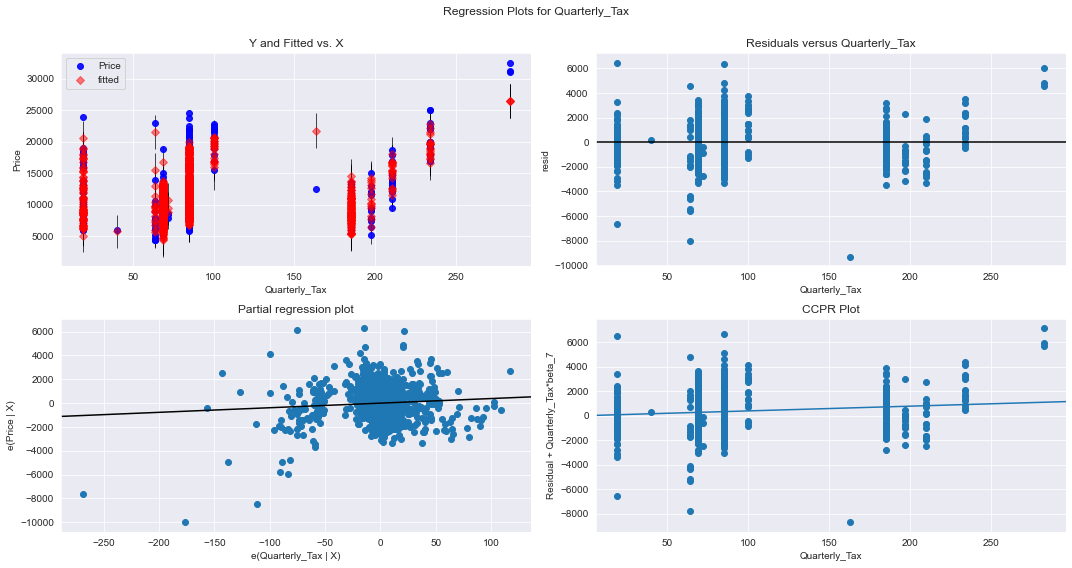

In [114]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig = fig)
plt.show()

In [115]:
# Model Deletion Diagnostic
# Detecting outliers / Influencers

#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance


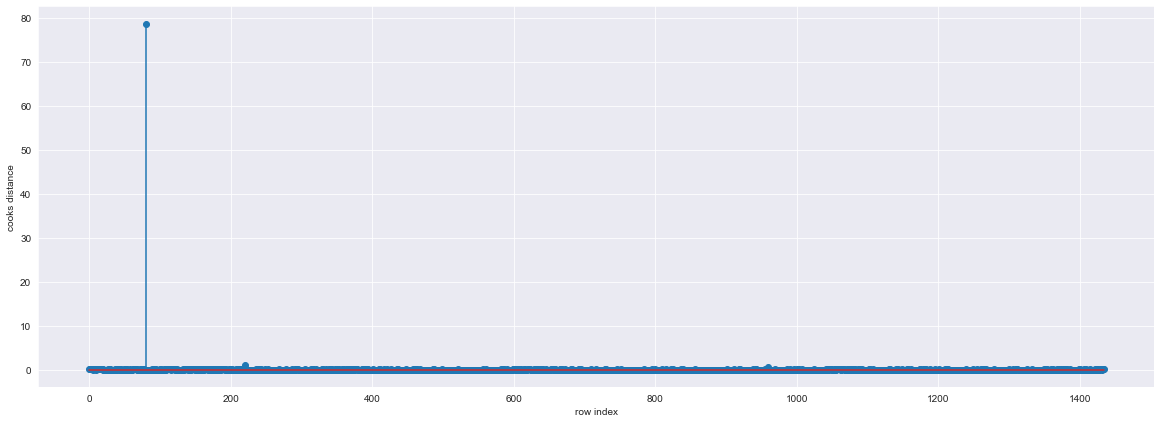

In [116]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Toyota)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [117]:
# Index value where cook's distance is greater than 10
(np.argmax(c),np.max(c))

(80, 78.7295058224984)

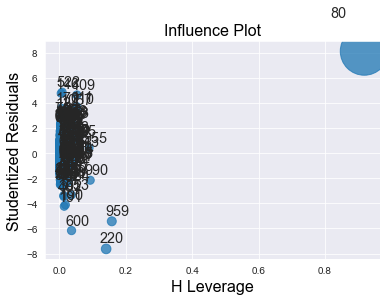

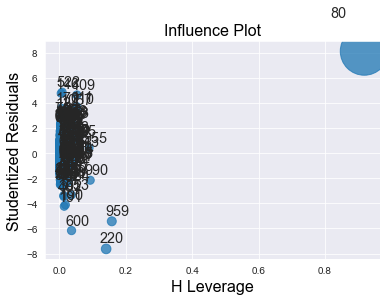

In [118]:
# High Influence points
influence_plot(model)

In [119]:
k = Toyota.shape[1]
n = Toyota.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff 

0.020905923344947737

In [120]:
# To pull out the value

Toyota[Toyota.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [121]:
Toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [122]:
#Changing the cc value from 16000 to 1600
Toyota.at[80, 'cc'] = 1600


In [123]:
Toyota[Toyota.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,1600,5,5,100,1180


In [124]:
# Rebuilding the model
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Toyota).fit()

In [125]:
model.params

Intercept       -6236.413116
Age_08_04        -120.516057
KM                 -0.017811
HP                 39.220368
cc                 -2.514227
Doors             -26.312668
Gears             526.715016
Quarterly_Tax       8.927156
Weight             20.111208
dtype: float64

In [126]:
print(model.tvalues, "\n", model.pvalues)

Intercept        -4.508801
Age_08_04       -47.055573
KM              -13.942408
HP               13.469932
cc               -8.181980
Doors            -0.670705
Gears             2.731710
Quarterly_Tax     6.258616
Weight           18.011049
dtype: float64 
 Intercept         7.053492e-06
Age_08_04        1.718676e-292
KM                1.627085e-41
HP                5.122211e-39
cc                6.119885e-16
Doors             5.025169e-01
Gears             6.378373e-03
Quarterly_Tax     5.126666e-10
Weight            1.660363e-65
dtype: float64


In [127]:
# Calculating VIF
rsq_c = smf.ols("cc ~ Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax + Weight", data = Toyota).fit().rsquared
vif_c = 1 / (1 - rsq_c) # 1.175091

rsq_a = smf.ols("Age_08_04 ~ KM + HP + Doors + Gears + Quarterly_Tax + Weight + cc", data = Toyota).fit().rsquared
vif_a = 1 / (1 - rsq_a) # 2.326773

rsq_km = smf.ols("KM ~ HP + Doors + Gears + Quarterly_Tax + Weight + cc + Age_08_04", data = Toyota).fit().rsquared
vif_km = 1 / (1 - rsq_km) # 2.468903

rsq_hp = smf.ols("HP ~ Doors + Gears + Quarterly_Tax + Weight + cc + Age_08_04 + KM ", data = Toyota).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_d = smf.ols("Doors ~ Gears + Quarterly_Tax + Weight + cc + Age_08_04 + KM + HP", data = Toyota).fit().rsquared
vif_d = 1 / (1 - rsq_d)

rsq_g = smf.ols("Gears ~ Quarterly_Tax + Weight + cc + Age_08_04 + KM + HP + Doors", data = Toyota).fit().rsquared
vif_g = 1 / (1 - rsq_g)

rsq_q = smf.ols("Quarterly_Tax ~ Weight + cc + Age_08_04 + KM + HP + Doors + Gears", data = Toyota).fit().rsquared
vif_q = 1 / (1 - rsq_q)

rsq_w = smf.ols("Weight ~ cc + Age_08_04 + KM + HP + Doors + Gears + Quarterly_Tax", data = Toyota).fit().rsquared
vif_w = 1 / (1 - rsq_w)

data = {"variables": ["cc", "Age_08_04", "KM", "HP", "Doors", "Gears", "Quarterly_Tax", "Weight"], "VIF":[vif_c, vif_a, vif_km, vif_hp, vif_d, vif_g, vif_q, vif_w]}
Vif_frame = pd.DataFrame(data)
Vif_frame 


,variables,VIF
0,cc,2.747057
1,Age_08_04,1.882548
2,KM,1.910353
3,HP,1.584766
4,Doors,1.163364
5,Gears,1.101076
6,Quarterly_Tax,2.842812
7,Weight,2.835107


In [128]:
# Residual plots for homoscedasticity
def get_standardized_values (vals):
    return(vals - vals.mean() / vals.std())   # z score

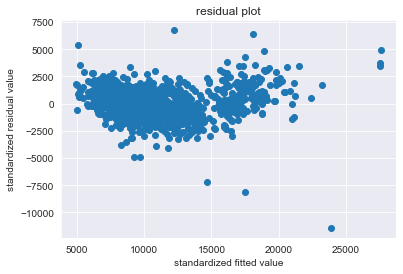

In [129]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted value")
plt.ylabel("standardized residual value")
plt.show()

In [130]:
#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

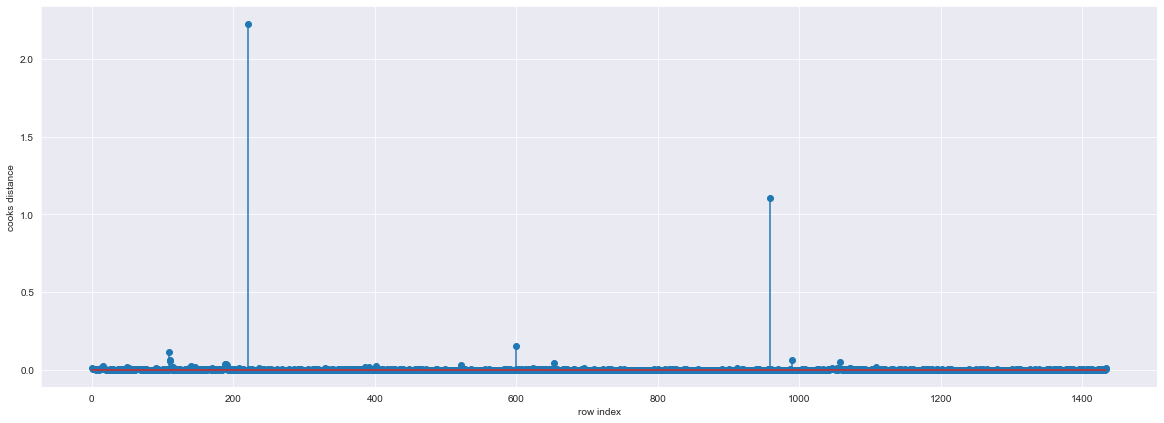

In [131]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Toyota)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [132]:
(np.argmax(c),np.max(c))

(220, 2.226594140327505)

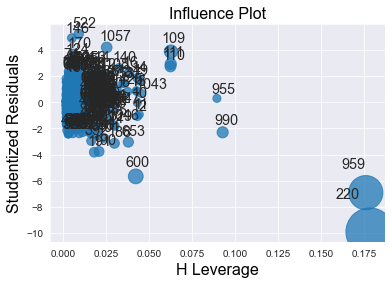

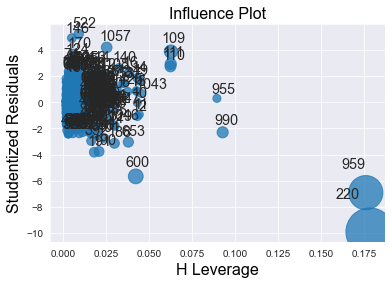

In [133]:
# High Influence points
influence_plot(model)

In [134]:
k = Toyota.shape[1]
n = Toyota.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff 

0.020905923344947737

In [135]:
Toyota[Toyota.index.isin([220,959])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


In [136]:
Toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [137]:
Toyotanew = Toyota

In [138]:
Toyotanew = Toyota.drop(Toyotanew.index[[220,959]], axis = 0).reset_index()

In [139]:
Toyotanew = Toyotanew.drop(["index"],axis = 1)

In [140]:
Toyotanew

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [141]:
# Rebuilding the model
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Toyotanew).fit()

In [142]:
model.params

Intercept       -14708.535444
Age_08_04         -112.057376
KM                  -0.016975
HP                  36.553748
cc                  -3.788937
Doors             -121.999406
Gears              466.356856
Quarterly_Tax        5.164930
Weight              30.599287
dtype: float64

In [143]:
#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

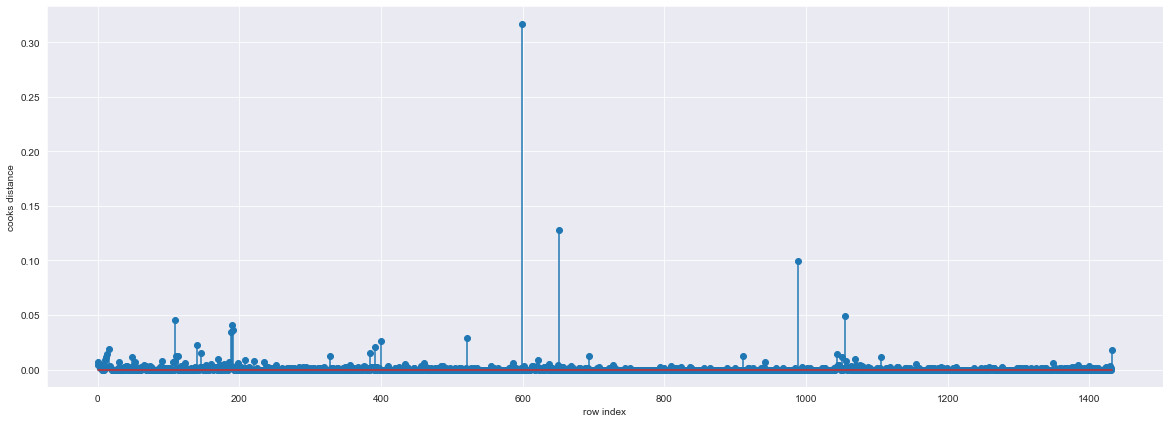

In [144]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Toyotanew)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [145]:
(np.argmax(c),np.max(c))

(599, 0.3166453893481835)

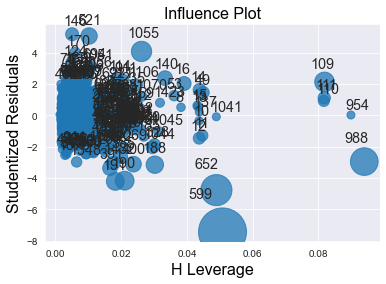

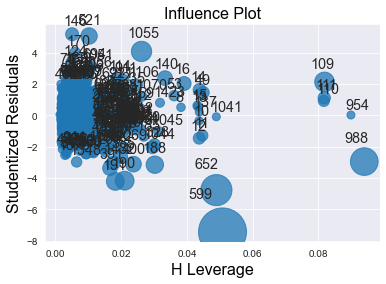

In [146]:
influence_plot(model)

In [149]:
k = Toyotanew.shape[1]
n = Toyotanew.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff 

0.0209351011863224

In [150]:
Toyotanew[Toyotanew.index.isin([599])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
599,7500,50,1,90,2000,3,5,64,1260


In [151]:
Toyotanew.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [152]:
Toyotafinal = Toyotanew

In [153]:
Toyotafinal = Toyotanew.drop([599], axis = 0).reset_index()

In [154]:
Toyotafinal = Toyotafinal.drop(["index"], axis = 1)

In [156]:
Toyotafinal

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


In [162]:
# Rebuilding the model
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Toyotafinal).fit()

In [163]:
model.params

Intercept       -16149.878138
Age_08_04         -110.364770
KM                  -0.017680
HP                  34.258136
cc                  -3.681943
Doors             -143.569224
Gears              469.385345
Quarterly_Tax        3.638059
Weight              32.158934
dtype: float64

In [164]:
#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

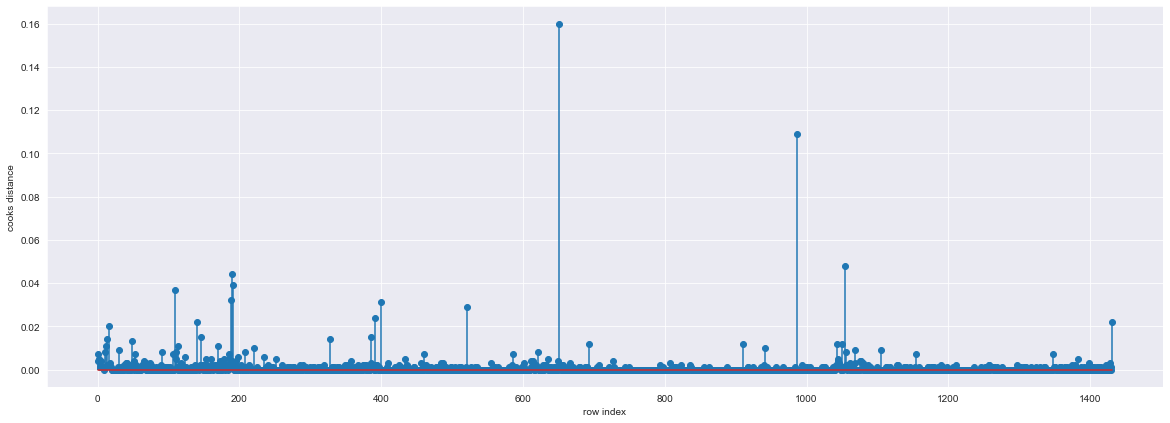

In [165]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Toyotafinal)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [166]:
(np.argmax(c),np.max(c))

(651, 0.16020822508429597)

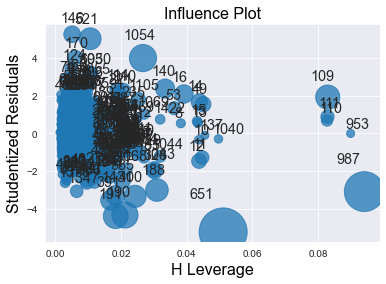

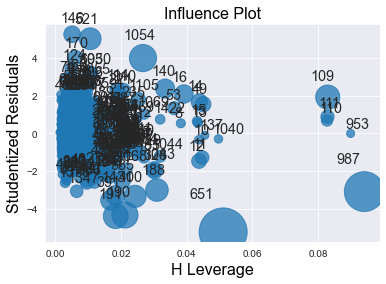

In [167]:
influence_plot(model)

In [168]:
Toyotafinal[Toyotafinal.index.isin([651,987])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
651,6950,65,114383,90,2000,3,5,64,1260
987,7950,58,43000,110,1600,4,3,72,1114


In [169]:
Toyotafinal.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [170]:
Toyota_final = Toyotafinal

In [171]:
Toyota_final = Toyotafinal.drop([651,987], axis = 0).reset_index()

In [172]:
Toyota_final = Toyota_final.drop(["index"], axis = 1)

In [173]:
Toyota_final

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1425,7500,69,20544,86,1300,3,5,69,1025
1426,10845,72,19000,86,1300,3,5,69,1015
1427,8500,71,17016,86,1300,3,5,69,1015
1428,7250,70,16916,86,1300,3,5,69,1015


In [174]:
# Rebuilding the model
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = Toyota_final).fit()

In [175]:
model.params

Intercept       -16651.865887
Age_08_04         -109.172561
KM                  -0.017564
HP                  33.571999
cc                  -3.681594
Doors             -169.977558
Gears              286.373411
Quarterly_Tax        2.394043
Weight              33.687987
dtype: float64

In [176]:
#Cook's distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

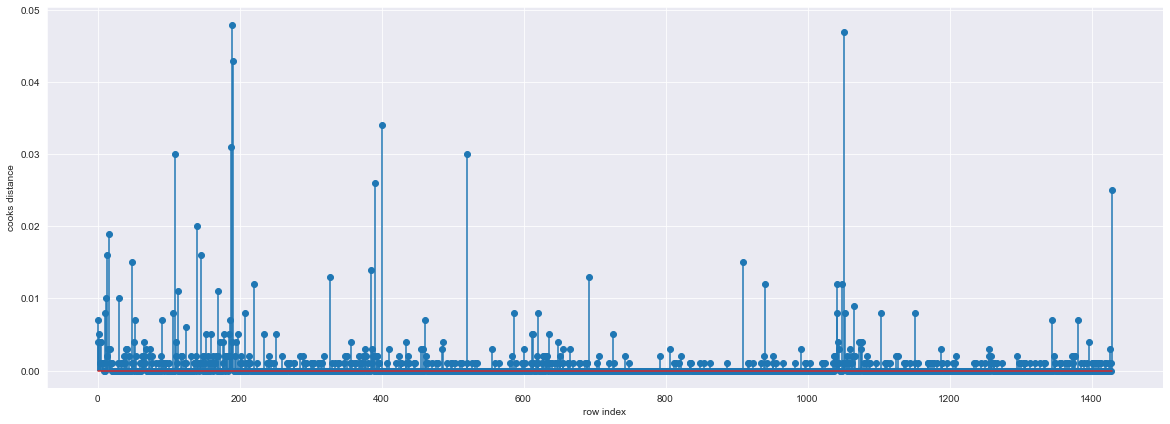

In [177]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(Toyota_final)), np.round(c, 3))
plt.xlabel("row index")
plt.ylabel("cooks distance")
plt.show()

In [178]:
# Since there aren't any outliers, the regression equation is good to proceed with the predictions.

##### Regression Equation =  -16651.865887 + (-109.172561) * Age_08_04 + (-0.017564) * KM + 33.571999 * HP + (-3.681594) * cc + (-169.977558) * Doors + 286.373411 * Gears + 2.394043 * Quarterly_Tax + 33.687987 * Weight